# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns

# Create two new dataframes
north_df=pd.read_csv("C:/Users/emmag/Desktop/Women+/call-center-cleanup-assignment/NorthCallCenter.csv")
south_df=pd.read_csv("C:/Users/emmag/Desktop/Women+/call-center-cleanup-assignment/SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [3]:
north_df.tail(60)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
185,185,North,Product Support,2:00 PM,Outgoing,A,Andy,NO,0,0,8,1,NaN,4,1
186,186,North,Product Support,2:00 PM,Outgoing,B,Todd,NO,0,0,9,1,NaN,4,1
187,187,North,Product Support,2:00 PM,Outgoing,A,Amanda,NO,0,0,10,2,NaN,3,1
188,188,North,Product Support,2:00 PM,Outgoing,A,Andy,NO,0,0,8,3,NaN,3,1
189,189,North,Product Support,2:00 PM,Outgoing,B,Duke,NO,0,0,10,3,NaN,4,1
190,190,North,Product Support,2:00 PM,Outgoing,B,Brent,NO,0,0,10,1,NaN,3,1
191,191,North,Product Support,2:00 PM,Outgoing,A,Andy,NO,0,0,10,3,NaN,2,1
192,192,North,Product Support,2:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,4,1
193,193,North,Product Support,2:00 PM,Outgoing,A,Cam,NO,0,0,12,2,NaN,2,1
194,194,North,Product Support,2:00 PM,Outgoing,B,Todd,NO,0,0,12,3,NaN,4,1


#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
north_df.nunique()
#9

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
south_df.nunique()
#11

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:
north_df.mean(numeric_only=True)
# busy - 9.99
# not ready - 1.91
# incoming - 3.05
# during - 2.98

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
south_df.mean(numeric_only=True)
# busy - 10.05
# not ready - 1.91
# incoming - 3
# during - 3.08

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# Code Used:
north_times=north_df.loc[:,["Time Block", "Calls"]] #created new series with only required info
south_times=south_df.loc[:,["Time Block", "Calls"]]
both_times=north_times.append(south_times, ignore_index=True) #combined two series into one
both_times.groupby("Time Block").count() # grouped new series by Time Block and used the count function

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\1357220954.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both_times=north_times.append(south_times, ignore_index=True) #combined two series into one


,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.98
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: While I think likely the missing data (all included in the "Incoming Wait Time" columns) is indicative of a 0 value, as in 0 seconds before the call was picked up. Because of this, TA instruction led me to leave the missing data as missing.

In [9]:
# Code Used
percent_missing_north = north_df.isnull().sum() * 100 / len(north_df) #creating missing value percentage list for each df
percent_missing_south = south_df.isnull().sum() * 100 / len(south_df)
print(percent_missing_north)
percent_missing_south
# Add Additional Cells as needed.


Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64


Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       59.872611
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: This is likely because one of the "yes" values had a trailing space, I can recitfy this with a str.strip()

<Axes: >

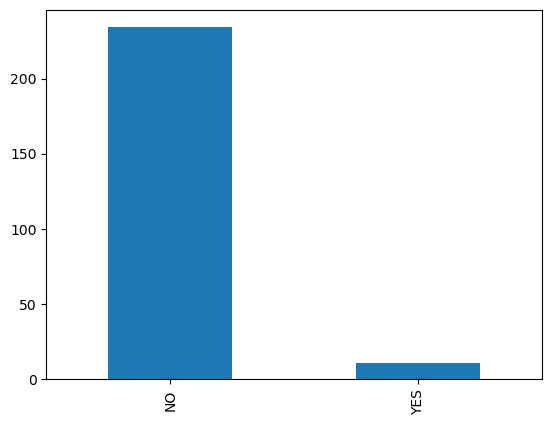

In [10]:
#Code Used
north_df['Sale']=north_df['Sale'].str.strip()
north_df["Sale"].value_counts().plot(kind='bar') #checking my work
# Add Additional Cells as needed.


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Yes, though they were not easily found because their identifier was unique. I created a copy of the dataframes without identifier and then removed the duplicates identified in that dataframe from the original dataframe.

In [11]:
#Code Used
north_df.rename( columns={'Unnamed: 0':'Call Number'}, inplace=True ) #renaming so I can then delete the id column to check for
# duplicates
south_df.rename( columns={'Unnamed: 0':'Call Number'}, inplace=True )

# Add Additional Cells as needed.

In [12]:
noidnorth=north_df.drop('Call Number', axis=1) #created temporary df without id to check for duplicates
noidsouth=south_df.drop("Call Number", axis=1)

duplicaterowsnorth = noidnorth[noidnorth.duplicated()] #this identifies row 50 and 105 as duplicates in north
duplicaterowssouth=noidsouth[noidsouth.duplicated()] #this identifies rows 58, 170, and 180 as duplicates in south
duplicaterowssouth

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [13]:
# south_df = south_df.drop(index=180) this line of code was used and changed to delete each of the duplicate rows one by one -
# I thought that the index value would change as I deleted each row but it did not appear to

In [14]:
duplicaterowssouth = noidsouth[noidsouth.duplicated()]
print(duplicaterowssouth)
duplicaterowsnorth = noidnorth[noidnorth.duplicated()]
duplicaterowsnorth # these lines of code were checking that my duplicate deletion worked

    Branch   Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
58   South  Sales Support   12:00 PM             Incoming     D   Kate   NO   
170  South  Sales Support   11:00 AM             Outgoing     D  Randy   NO   
180  South  Sales Support   12:00 PM             Outgoing     C  Sandy   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
58           0          0             8                  1   
170          0          0             8                  3   
180          0          0             8                  1   

     Incoming Wait Time  During Call Wait Time  Calls  
58                  3.0                      3      1  
170                 NaN                      2      1  
180                 NaN                      4      1  


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [15]:
print(north_df.iloc[[46, 47, 48, 49, 50, 51, 52]])

    Call Number Branch   Call Purpose Time Block Incoming or Outgoing Queue  \
46           46  North  Sales Support   12:00 PM             Incoming     A   
47           47  North  Sales Support   10:00 AM             Incoming     A   
48           48  North  Sales Support   11:00 AM             Incoming     A   
49           49  North  Sales Support   12:00 PM             Incoming     A   
50           50  North  Sales Support   12:00 PM             Incoming     A   
51           51  North  Sales Support    2:00 PM             Incoming     B   
52           52  North  Sales Support    2:00 PM             Incoming     B   

    Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
46    Andy   NO          0          1            12                  1   
47  Amanda  YES          0          0            10                  3   
48    Andy   NO          0          0            12                  3   
49     Joe   NO          0          0            10                  1 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: No, I did not believe that any of the data was unnecessary. I took lengths to preserve the call number column because it may end up being necessary

In [16]:
#Code Used
# No code used to determine this
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [17]:
# Create dataframe for the entire company named df
df=north_df.append(south_df, ignore_index=True)
df.tail()

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\3974563917.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=north_df.append(south_df, ignore_index=True)


,Call Number,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
558,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Eric, 35
- South Branch = Brent, 37


In [18]:
# Code Used
calls_by_rep=df.groupby(["Branch", "Rep ID"]).sum().sort_values(["Branch", "Calls"], ascending=False)
calls_by_rep
# Add Additional Cells as needed.

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\3059987956.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  calls_by_rep=df.groupby(["Branch", "Rep ID"]).sum().sort_values(["Branch", "Calls"], ascending=False)


Call Number  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                    
South  Eric           5039          0          0           361   
       Randy          4576          3          1           320   
       Sandy          4694          1          0           325   
       Helga          5236          0          2           292   
       George         4620          0          0           298   
       Kate           4615          0          0           291   
       Karl           4532          1          0           287   
       Josh           3960          3          0           260   
       Susan          4006          2          0           267   
       Sharon         4226          1          1           257   
       Alice          3637          0          0           199   
North  Brent          4840          0          1           362   
       Lilly          3375          0          2           307   
       Duke           2999          2          0           292   
       Todd           4252          1          0           296   
       Joe            3178          0          0           256   
       Cam            2746          1          0           233   
       Xander         3340          1          0           244   
       Amanda         2666          0          1           229   
       Andy           2494          0          3           228   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Rep ID                                                                 
South  Eric                   54                47.0                    112   
       Randy                  66                47.0                     98   
       Sandy                  60                34.0                    100   
       Helga                  58                36.0                     95   
       George                 53                41.0                     87   
       Kate                   61                37.0                     83   
       Karl                   61                26.0                     85   
       Josh                   50                31.0                     83   
       Susan                  53                35.0                     88   
       Sharon                 38                29.0                     77   
       Alice                  46                15.0                     58   
North  Brent                  71                17.0                    117   
       Lilly                  59                37.0                     88   
       Duke                   56                39.0                     85   
       Todd                   58                21.0                     97   
       Joe                    49                36.0                     81   
       Cam                    46                32.0                     66   
       Xander                 44                20.0                     68   
       Amanda                 43                12.0                     60   
       Andy                   43                36.0                     65   

               Calls  
Branch Rep ID         
South  Eric       35  
       Randy      33  
       Sandy      32  
       Helga      31  
       George     29  
       Kate       29  
       Karl       28  
       Josh       26  
       Susan      26  
       Sharon     25  
       Alice      20  
North  Brent      37  
       Lilly      30  
       Duke       29  
       Todd       29  
       Joe        26  
       Cam        24  
       Xander     24  
       Amanda     23  
       Andy       23

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No, although South Branch does much better than North Branch

In [19]:
# Code Used

north_calls=df["Branch"].value_counts()["North"] #gives me how many calls in total by North
abandonment_by_branch=df.groupby(["Branch"]).sum() #this shows all data, including abandoned calls, by Branch
north_abandoned_all=df.loc[(df["Branch"] == "North") & (df["Abandoned"]== 1)].count() #this gives the count of all variables for
#all rows meeting the criteria on North Branch and Abandoned
north_abandoned=north_abandoned_all["Calls"] #this singles out just the Calls column
abandonment_rate_north=(north_abandoned/north_calls)*100 #this does the rate math
# abandonment_rate_north
abandonment_by_branch
# Add Additional Cells as needed.

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\1981624220.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  abandonment_by_branch=df.groupby(["Branch"]).sum() #this shows all data, including abandoned calls, by Branch


,Call Number,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,
North,29890,5,7,2447,469,250.0,727,245
South,49141,11,4,3157,600,378.0,966,314


In [20]:
south_calls=df["Branch"].value_counts()["South"]
south_abandoned_all=df.loc[(df["Branch"] == "South") & (df["Abandoned"]== 1)].count()
south_abandoned=south_abandoned_all["Calls"]
abandonment_rate_south=(south_abandoned/south_calls)*100
abandonment_rate_south

1.2738853503184715

In [21]:
total_calls=df["Calls"].sum() #give me number of total calls
abandoned_calls=df['Abandoned'].value_counts()[1] #gives me number of rows where abandoned value is 1, aka number of abandoned calls
abandoned_rate=(abandoned_calls/total_calls) * 100 #calculate rate based on total calls and abandoned calls
abandoned_rate

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%
- South Branch = 15.29%
- Company Wide = 14.49%

In [22]:
# Code Used
def service_indicator (series): #this function (and below) adds a column with a boolean value if service level is met
    if series <= 2:
        return True
    else:
        return False

df["Service Level Met"]=df["Incoming Wait Time"].apply(service_indicator)

service_by_branch=df.groupby(["Branch"]).sum() #this shows all data grouped by Branch including new column

north_service_all=df.loc[(df["Branch"] == "North") & (df["Service Level Met"] == True)].count() #this pulls all rows from the 
#North branch who met the service indicator
north_service=north_service_all["Calls"] #this returns only the value in the Calls column
north_service_rate=(north_service/north_calls)*100 #does the rate math
north_service_rate


C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\578707129.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  service_by_branch=df.groupby(["Branch"]).sum() #this shows all data grouped by Branch including new column


13.46938775510204

In [23]:
south_service_all=df.loc[(df["Branch"] == "South") & (df["Service Level Met"] == True)].count() 
south_service=south_service_all["Calls"] 
south_service_rate=(south_service/south_calls)*100 
south_service_rate

15.286624203821656

In [24]:
service_met_calls=df['Service Level Met'].value_counts()[True]
service_rate=(service_met_calls/total_calls)*100
service_rate

14.490161001788909

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [25]:
# Code Used 
answer_speed=df.groupby("Branch").mean() #to find mean of incoming wait time by branch
df["Incoming Wait Time"].mean() #to find mean of incoming wait time company-wide

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\255074551.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  answer_speed=df.groupby("Branch").mean() #to find mean of incoming wait time by branch


3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because it is the simplest visual to compare values across subgroups

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\940467041.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


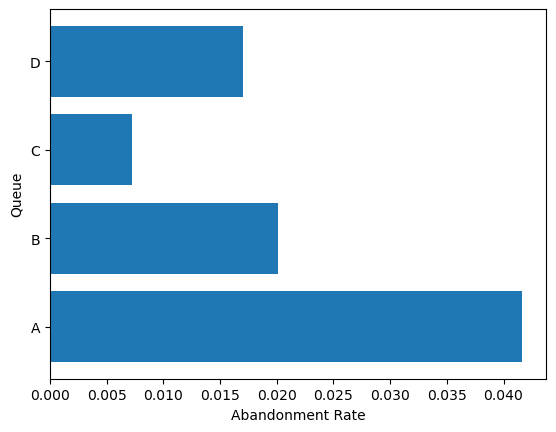

In [26]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 


#Your Code Here:

queues = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())

plt.barh(queues, rates)

plt.xlabel("Abandonment Rate")
plt.ylabel("Queue")

plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: After first attempting a stacked bar chart, which I didn't like because the values for the two variables I was comparing were so different, I decided on a subplot of two bar charts for easier comparison. 

In [27]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# # Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# # Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# # Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# #Your Code Here:

service_level.drop(['Calls_x', 'Calls_y'], axis=1, inplace=True) #dropped columns unnecessary for visualization
north_plt.set_index("Rep ID", inplace=True) #made two dfs match by dropping index
complete_df=north_plt.merge(service_level, on="Rep ID") #merged together on Rep ID

In [28]:
# this is the code for a grouped bar chart but I'm not sure I like it because the values are so different for each measurement

# x=np.arange(9)
# y1=complete_df["Incoming Wait Time"]
# y2=complete_df["Service Level %"]
# width=0.40

# plt.bar(x-0.2, y1, width)
# plt.bar(x+0.2, y2, width)

In [29]:
complete_df.reset_index(inplace=True) #had to do this after making Rep ID the index to merge

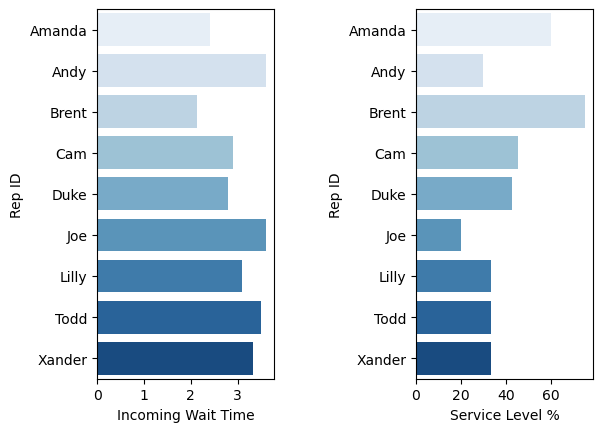

In [30]:
#running attempt at bar chart subplots with different scales
fig, axes = plt.subplots(1, 2)

sns.barplot(x = 'Incoming Wait Time',y = 'Rep ID',data = complete_df,palette = "Blues", ax=axes[0])

sns.barplot(x = 'Service Level %', y = "Rep ID", data = complete_df,palette= "Blues", ax=axes[1])

plt.subplots_adjust(wspace = 0.8)

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a stacked bar chart because even though it required reworking the provided code, I felt it showed the data in the most succinct and meaningful way.

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\2213411760.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  purpose_group=df.groupby(["Call Purpose", "Incoming or Outgoing"]).sum() #this shows calls grouped by in/out and purpose
C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\2213411760.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  final_grouped_graph=grouped_graph.pivot("Call Purpose", "Incoming or Outgoing", "Calls")


<Axes: xlabel='Call Purpose'>

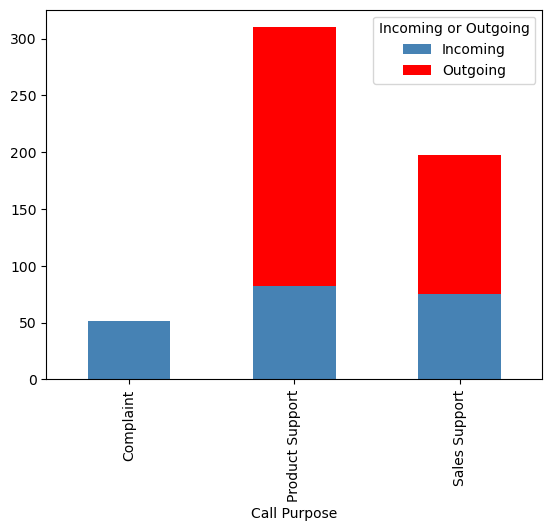

In [74]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

graph_df=df[["Call Purpose", "Incoming or Outgoing", "Calls"]] #this creates a new df with just the data I need

grouped_graph=graph_df.groupby(["Call Purpose", "Incoming or Outgoing"]).sum() #groupby table to get the sum of call types
grouped_graph.reset_index(inplace=True) #resetting index so I can use the index column in my pivot
final_grouped_graph=grouped_graph.pivot("Call Purpose", "Incoming or Outgoing", "Calls") #pivot the graph
final_grouped_graph.reset_index(inplace=True) #reset index so I can use the index column in my graph
final_grouped_graph.set_index('Call Purpose').plot(kind='bar', stacked=True, color=['steelblue', 'red']) #make the graph




#OLD CODE
# purpose_group = df.groupby("Call Purpose")
# call_purpose = ["Complaint", "Product Support", "Sales Support"]
# purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# purpose_counts

# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

# #Your Code Here:




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: While they do operate fairly similarly, the South branch seems to operate more efficiently, even accounting for the two extra representatives - the North branch had higher abandonment rates, has a very slightly longer average wait time, and averaged 27.22 calls per rep while the South branch averaged 28.55.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Leaning into my cynical side, I would say South - they have a heavier load and seem to be operating at their best already. However, because there are incalculable variables that might account for the slower pace of the North branch coupled with their lower performance, I would send an extra rep to the North branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: The one very minor analysis I did to answer these questions that wasn't in the original analysis was average call load per rep based on the given data. To me that was valuable to help assess the performance of each branch when controlled for the South having two more reps.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

C:\Users\emmag\AppData\Local\Temp\ipykernel_10464\3392400208.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouping=call_times.groupby("Time Block").sum()


<Axes: xlabel='Time Block'>

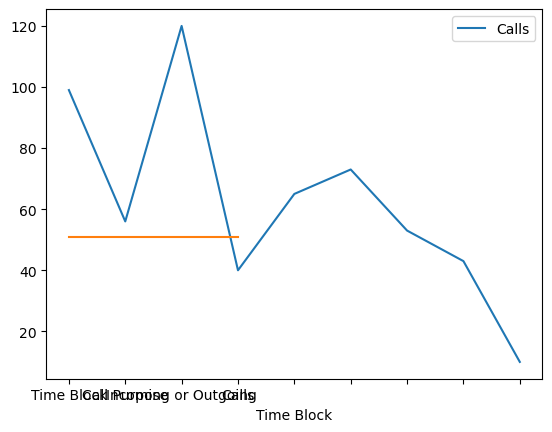

In [140]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# Use groupby to plot based on time blocks:

grouping=call_times.groupby("Time Block").sum()
grouping.plot(rot=90)

# Use groupby and get_group to select which call purpose to plot:
grouping2=call_times.groupby("Call Purpose").get_group("Complaint")
grouping2.plot(x="Time Block")